## Connect to database & Call data 

In [3]:
import psycopg2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Database connection details
db_config = {
    'host': 'localhost',     # e.g., 'localhost'
    'port': '5432',     # Default PostgreSQL port
    'database': 'ENGO641', # add database name and details
    'user': 'postgres',     
    'password': '#####'  
}

# Connect to PostgreSQL and fetch TrafficSignals table
try:
    connection = psycopg2.connect(**db_config)
    print("Connected to the database")

    # Query to fetch the TrafficSignals table
    query = 'SELECT * FROM "Lab5"."TrafficSignal";'
    
    traffic_signals_data = pd.read_sql(query, connection)  # Load data into a pandas DataFrame
    print(traffic_signals_data.head())  # Display the first few rows
except Exception as e:
    print(f"Error: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed")

Connected to the database
   gid    instdate        firstroad                  secondroad quadrant  \
0    1  1954-01-01         6 AVENUE                    9 STREET       SW   
1    2  1998-10-13        12 AVENUE                    6 STREET       SW   
2    3  2019-12-02    AIRPORT TRAIL                   60 STREET       NE   
3    4  2000-07-14  APPLEWOOD DRIVE                   68 STREET       SE   
4    5  2009-10-16  KENSINGTON ROAD  MEMORIAL DRIVE/PARKDALE BV       NW   

                        int_type pedbuttons ped_timer accessible  \
0                 Traffic signal        Yes       Yes        Yes   
1                 Traffic signal        Yes       Yes        Yes   
2  Traffic signal T intersection        Yes       Yes         No   
3  Traffic signal T intersection        Yes        No         No   
4                     1/2 signal        Yes       Yes        Yes   

             latitude            longitude count mistno      unitid  \
0  51.048037465296225  -114.083748468

# Applying DBSCAN Clustering and visualizing the clustering result

Find out the best eps and min_sample and apply DBSCAN

In [7]:
traffic_signals_data['latitude']= traffic_signals_data['latitude'].astype(float)
traffic_signals_data['longitude']= traffic_signals_data['longitude'].astype(float)

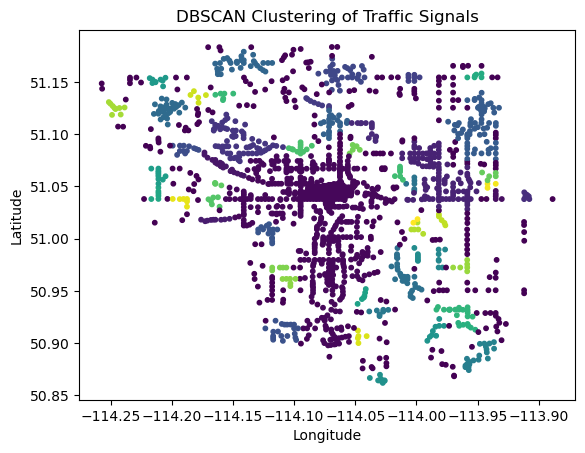

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Filter relevant columns
features = traffic_signals_data[['latitude', 'longitude']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Configure and apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps and min_samples if needed
traffic_signals_data['Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters
plt.scatter(traffic_signals_data['longitude'], traffic_signals_data['latitude'], 
            c=traffic_signals_data['Cluster'], cmap='viridis', s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Traffic Signals')
plt.show()

## Now lets move to K_Means clustering

Text(0.5, 1.0, 'KMeans Clustering of TrafficSignals')

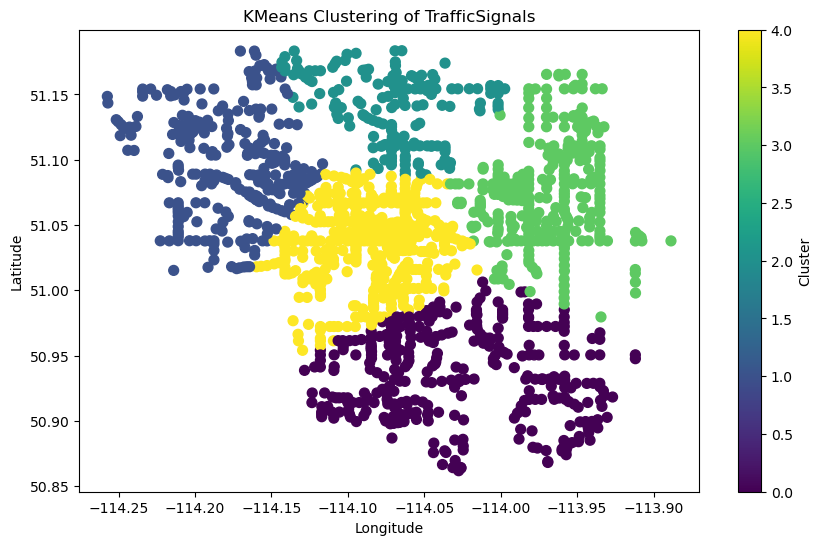

In [10]:
from sklearn.cluster import KMeans

features = traffic_signals_data[['latitude', 'longitude']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans with a specified number of clusters
kmeans = KMeans(n_clusters=5)  # Adjust n_clusters as needed
traffic_signals_data['cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(traffic_signals_data['longitude'], traffic_signals_data['latitude'], c=traffic_signals_data['cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KMeans Clustering of TrafficSignals')